In [1]:
import pandas as pd
import numpy as np

In [2]:
# Set Work Path
import os
path="C:/Users/zelic/Downloads/04.추가특허출원대상/fw"
os.chdir(path)

In [3]:
# Read Datasets
df_new = pd.read_excel("항공데이터_201805_09.xlsx",sheet_name=0, header = None, skiprows = 1, dtype = str)

In [4]:
df_new.columns = ['date','day', 'flight','time_exp','time_real','airport','airport_desc', 'type', 'terminal', 'status','gate', 'apron','carousel']
df_new.tail(5)

,date,day,flight,time_exp,time_real,airport,airport_desc,type,terminal,status,gate,apron,carousel
147321,20180930,일,ZE994,0125,0205,VVO,블라디보스토크,A,T1,정상,114,114,7
147322,20180930,일,ZH9033,1355,1401,SZX,선전,A,T1,정상,17,17,4
147323,20180930,일,ZH9034,1455,1533,SZX,선전,D,T1,정상,17,17,NaN
147324,20180930,일,ZH9037,2145,2116,SZX,선전,A,T1,정상,16,16,2
147325,20180930,일,ZH9038,2245,2301,SZX,선전,D,T1,정상,16,16,NaN


In [5]:
df_new['airline_code'] = df_new['flight'].str[0:2]
print(df_new.shape)
df_new.tail(5)

(147326, 14)


,date,day,flight,time_exp,time_real,airport,airport_desc,type,terminal,status,gate,apron,carousel,airline_code
147321,20180930,일,ZE994,0125,0205,VVO,블라디보스토크,A,T1,정상,114,114,7,ZE
147322,20180930,일,ZH9033,1355,1401,SZX,선전,A,T1,정상,17,17,4,ZH
147323,20180930,일,ZH9034,1455,1533,SZX,선전,D,T1,정상,17,17,NaN,ZH
147324,20180930,일,ZH9037,2145,2116,SZX,선전,A,T1,정상,16,16,2,ZH
147325,20180930,일,ZH9038,2245,2301,SZX,선전,D,T1,정상,16,16,NaN,ZH


In [6]:
df_airline_info = pd.read_excel("airline_airport_info.xlsx",sheet_name=0, dtype = str)
df_airline_info['airline_code'] = df_airline_info['airline_code'].str.strip()
df_airline_info.tail(5)

,airline_code,airline_name,airline_country
99,W5,NaN,NaN
100,5Y,NaN,NaN
101,BC,NaN,NaN
102,QF,NaN,NaN
103,FI,NaN,NaN


In [7]:
df_new = df_new.merge(df_airline_info, left_on='airline_code', right_on='airline_code', how='left')
print(df_new.shape)
df_new.tail(5)

(147326, 16)


,date,day,flight,time_exp,time_real,airport,airport_desc,type,terminal,status,gate,apron,carousel,airline_code,airline_name,airline_country
147321,20180930,일,ZE994,0125,0205,VVO,블라디보스토크,A,T1,정상,114,114,7,ZE,Eastar Jet,Republic of Korea
147322,20180930,일,ZH9033,1355,1401,SZX,선전,A,T1,정상,17,17,4,ZH,Shenzhen Airlines,China
147323,20180930,일,ZH9034,1455,1533,SZX,선전,D,T1,정상,17,17,NaN,ZH,Shenzhen Airlines,China
147324,20180930,일,ZH9037,2145,2116,SZX,선전,A,T1,정상,16,16,2,ZH,Shenzhen Airlines,China
147325,20180930,일,ZH9038,2245,2301,SZX,선전,D,T1,정상,16,16,NaN,ZH,Shenzhen Airlines,China


In [10]:
df_airport_info = pd.read_excel("airport_info.xlsx", dtype = str)
df_airport_info.head(5)

,airport,airport_name,airport_country
0,HKG,Hong Kong International Airport ( Chek Lap Kok ),Hong Kong
1,KIX,Kansai International Airport,Japan
2,BKK,Suvarnabhumi International Airport (New Bangk...,Thailand
3,TAO,Qingdao Liuting International Airport,China
4,NRT,Narita Airport,Japan


In [11]:
df_new = df_new.merge(df_airport_info, left_on='airport', right_on='airport', how='left')
print(df_new.shape)
df_new.tail(5)

(147326, 18)


,date,day,flight,time_exp,time_real,airport,airport_desc,type,terminal,status,gate,apron,carousel,airline_code,airline_name,airline_country,airport_name,airport_country
147321,20180930,일,ZE994,0125,0205,VVO,블라디보스토크,A,T1,정상,114,114,7,ZE,Eastar Jet,Republic of Korea,Vladivostok International Airport,Russia
147322,20180930,일,ZH9033,1355,1401,SZX,선전,A,T1,정상,17,17,4,ZH,Shenzhen Airlines,China,Shenzhen Bao'an International Airport,China
147323,20180930,일,ZH9034,1455,1533,SZX,선전,D,T1,정상,17,17,NaN,ZH,Shenzhen Airlines,China,Shenzhen Bao'an International Airport,China
147324,20180930,일,ZH9037,2145,2116,SZX,선전,A,T1,정상,16,16,2,ZH,Shenzhen Airlines,China,Shenzhen Bao'an International Airport,China
147325,20180930,일,ZH9038,2245,2301,SZX,선전,D,T1,정상,16,16,NaN,ZH,Shenzhen Airlines,China,Shenzhen Bao'an International Airport,China


In [12]:
df_new.to_pickle("df_new.pkl")

In [13]:
df_read = df_new[(df_new['type'] == 'D')]
df_read.shape

(73624, 18)

In [14]:
idx_nan = df_read['time_real'] == 'nan'
df_read = df_read[-idx_nan].reset_index(drop=True)
df_read.shape

(73624, 18)

In [15]:
df_read['datetime_exp'] = pd.to_datetime(df_read['date'] + df_read['time_exp'], format='%Y%m%d%H%M')
df_read['datetime_real'] = pd.to_datetime(df_read['date'] + df_read['time_real'], format='%Y%m%d%H%M')
df_read['hour'] = df_read['time_exp'].str[0:2]
df_read.head()

,date,day,flight,time_exp,time_real,airport,airport_desc,type,terminal,status,...,apron,carousel,airline_code,airline_name,airline_country,airport_name,airport_country,datetime_exp,datetime_real,hour
0,20180501,화,2P2483,0245,0243,TAG,보홀(탁빌라란),D,T1,정상,...,42,NaN,2P,NaN,NaN,Tagbilaran City Airport,Philippines,2018-05-01 02:45:00,2018-05-01 02:43:00,02
1,20180501,화,3U8904,2055,2122,CTU,청두,D,T1,정상,...,6,NaN,3U,NaN,NaN,Chengdu Shuangliu International Airport,China,2018-05-01 20:55:00,2018-05-01 21:22:00,20
2,20180501,화,5J129,2215,2246,CEB,세부,D,T1,정상,...,125,NaN,5J,CEBU Pacific Air,Philippines,Mactan International Airport,Philippines,2018-05-01 22:15:00,2018-05-01 22:46:00,22
3,20180501,화,5J187,0305,0330,MNL,마닐라,D,T1,정상,...,122,NaN,5J,CEBU Pacific Air,Philippines,Ninoy Aquino International Airport,Philippines,2018-05-01 03:05:00,2018-05-01 03:30:00,03
4,20180501,화,7C1102,0830,0851,NRT,도쿄/ 나리타,D,T1,정상,...,16,NaN,7C,Jeju Air,Republic of Korea,Narita Airport,Japan,2018-05-01 08:30:00,2018-05-01 08:51:00,08


In [16]:
df_read['time_gap'] = (df_read['datetime_real'] - df_read['datetime_exp']) / pd.Timedelta(minutes = 1)
print(df_read.shape)

df_read['delayed'] = [1 if x >= 60 else 0 for x in df_read['time_gap']]
df_read['year'] = df_read['datetime_exp'].dt.year
df_read['week'] = df_read['datetime_exp'].dt.week
df_read['weekday'] = df_read['datetime_exp'].dt.weekday

df_read.head()

(73624, 22)


C:\Users\zelic\AppData\Local\Temp\ipykernel_12376\1638350956.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_read['week'] = df_read['datetime_exp'].dt.week


,date,day,flight,time_exp,time_real,airport,airport_desc,type,terminal,status,...,airport_name,airport_country,datetime_exp,datetime_real,hour,time_gap,delayed,year,week,weekday
0,20180501,화,2P2483,0245,0243,TAG,보홀(탁빌라란),D,T1,정상,...,Tagbilaran City Airport,Philippines,2018-05-01 02:45:00,2018-05-01 02:43:00,02,-2.0,0,2018,18,1
1,20180501,화,3U8904,2055,2122,CTU,청두,D,T1,정상,...,Chengdu Shuangliu International Airport,China,2018-05-01 20:55:00,2018-05-01 21:22:00,20,27.0,0,2018,18,1
2,20180501,화,5J129,2215,2246,CEB,세부,D,T1,정상,...,Mactan International Airport,Philippines,2018-05-01 22:15:00,2018-05-01 22:46:00,22,31.0,0,2018,18,1
3,20180501,화,5J187,0305,0330,MNL,마닐라,D,T1,정상,...,Ninoy Aquino International Airport,Philippines,2018-05-01 03:05:00,2018-05-01 03:30:00,03,25.0,0,2018,18,1
4,20180501,화,7C1102,0830,0851,NRT,도쿄/ 나리타,D,T1,정상,...,Narita Airport,Japan,2018-05-01 08:30:00,2018-05-01 08:51:00,08,21.0,0,2018,18,1


In [17]:
df_read['year'] = df_read['year'].astype('str')
df_read['hour'] = df_read['hour'].astype('str')
df_read['week'] = df_read['week'].astype('str')
df_X_dummy_prep = df_read[['year','airport_country', 'airline_country', 'airline_code', 'airport', 'terminal', 'hour', 'week']]
df_X_dummy = pd.get_dummies(df_X_dummy_prep)
df_X_dummy.head()

,year_2018,airport_country_Australia,airport_country_Austria,airport_country_Brunei,airport_country_Cambodia,airport_country_Canada,airport_country_China,airport_country_Croatia,airport_country_Czech Republic,airport_country_Ethiopia,...,week_30,week_31,week_32,week_33,week_34,week_35,week_36,week_37,week_38,week_39
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Load Base File
df_X_base = pd.read_pickle('df_X_base.pkl')
column_order = df_X_base.columns

In [19]:
# Append X Dataframe to Base File
df_X_test = pd.concat([df_X_base,df_X_dummy], axis = 0)
print(df_X_test.shape)
df_X_test = df_X_test.reindex(columns=column_order).fillna(0)
df_X_test['bias'] = 1
print(df_X_test.shape)
df_X_test.head()

(73624, 540)
(73624, 536)


,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,airport_country_Australia,airport_country_Austria,airport_country_Bhutan,airport_country_Brazil,...,week_5,week_50,week_51,week_52,week_53,week_6,week_7,week_8,week_9,bias
0,0.0,0.0,0.0,0.0,0.0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [20]:
df_y_test = df_read['delayed']

In [21]:
# Save validation files
df_X_test.to_pickle('df_X_test.pkl')
df_y_test.to_pickle('df_y_test.pkl')

In [22]:
# Load Model

from keras.models import model_from_json

# load json and create model
json_file = open('model_architecture.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("best_model_dropout30.h5")
print("Model Loading Complete")

Model Loading Complete


2301/2301 [==============================] - 8s 4ms/step
0.25816173892989774


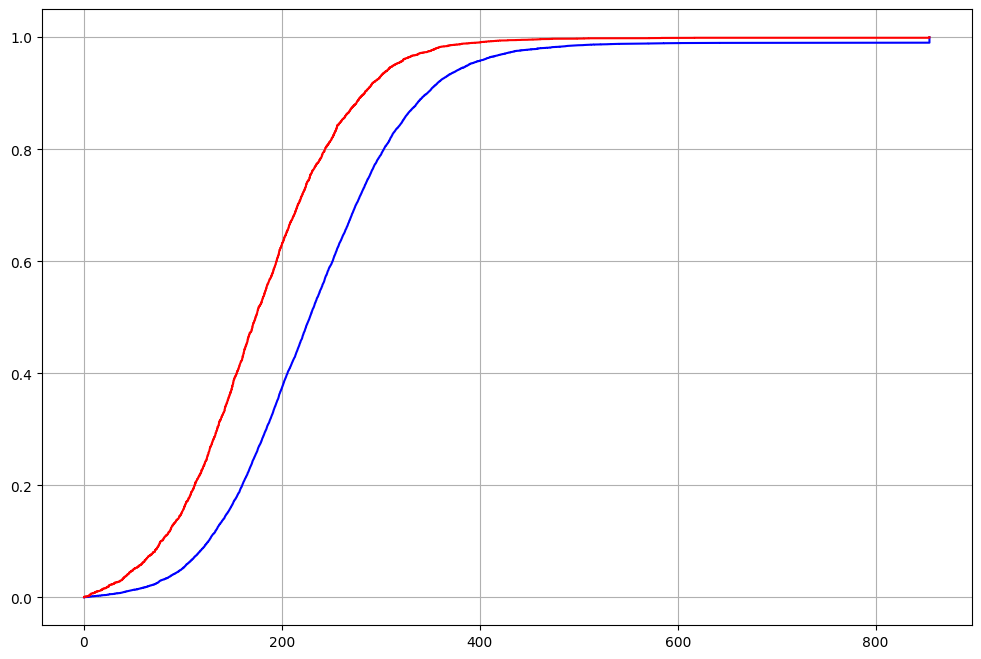

In [23]:
import matplotlib.pyplot as plt

result_test = df_read
result_test['delayed'] = df_y_test
#pd.DataFrame(df_y_test, columns = {'delayed'})
result_test['normal'] = 1 - result_test['delayed']
result_test['normal_prob'] = 1 - loaded_model.predict(df_X_test)
result_test['delayed_prob'] = 1 - result_test['normal_prob']

result_test['predict'] = [1 if x >= 0.5 else 0 for x in result_test['delayed_prob']]

result_test['normal_prob'] = [0.99999 if x >= 0.99999 else x for x in result_test['normal_prob']]
result_test['normal_prob'] = [0.00001 if x <= 0.00001 else x for x in result_test['normal_prob']]
result_test['delayed_prob'] = [0.99999 if x >= 0.99999 else x for x in result_test['delayed_prob']]
result_test['delayed_prob'] = [0.00001 if x <= 0.00001 else x for x in result_test['delayed_prob']]

result_test['odds'] = result_test['normal_prob'] / result_test['delayed_prob']
result_test.sort_values(by = 'delayed_prob', ascending = False, inplace = True)
result_test = result_test.reset_index(drop = True)
pdo = 50
result_test['score_temp'] = pdo / np.log(2) * np.log(result_test['odds'])
result_test_min_score = np.min(result_test['score_temp'])
result_test['score'] = result_test['score_temp'] - result_test_min_score
result_test.head()
result_test['normal_cusum'] = result_test['normal'].cumsum()
result_test['delayed_cusum'] = result_test['delayed'].cumsum()
result_test_max_normal_cumsum = np.max(result_test['normal_cusum'])
result_test_max_delayed_cumsum = np.max(result_test['delayed_cusum'])

result_test['normal_cusum_ratio'] = result_test['normal_cusum'] / result_test_max_normal_cumsum
result_test['delayed_cusum_ratio'] = result_test['delayed_cusum'] / result_test_max_delayed_cumsum
result_test['diff_cusum_ratio'] = result_test['delayed_cusum_ratio'] - result_test['normal_cusum_ratio'] 

print(np.max(abs(result_test['diff_cusum_ratio'])))

plt.figure(figsize=(12, 8))
plt.rcParams['axes.grid'] = True
plt.plot(result_test['score'], result_test['normal_cusum_ratio'], color = 'b')
plt.plot(result_test['score'], result_test['delayed_cusum_ratio'], color = 'r')
plt.show()

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     66869
           1       0.29      0.02      0.04      6755

    accuracy                           0.91     73624
   macro avg       0.60      0.51      0.49     73624
weighted avg       0.85      0.91      0.87     73624

0.6788902833859267


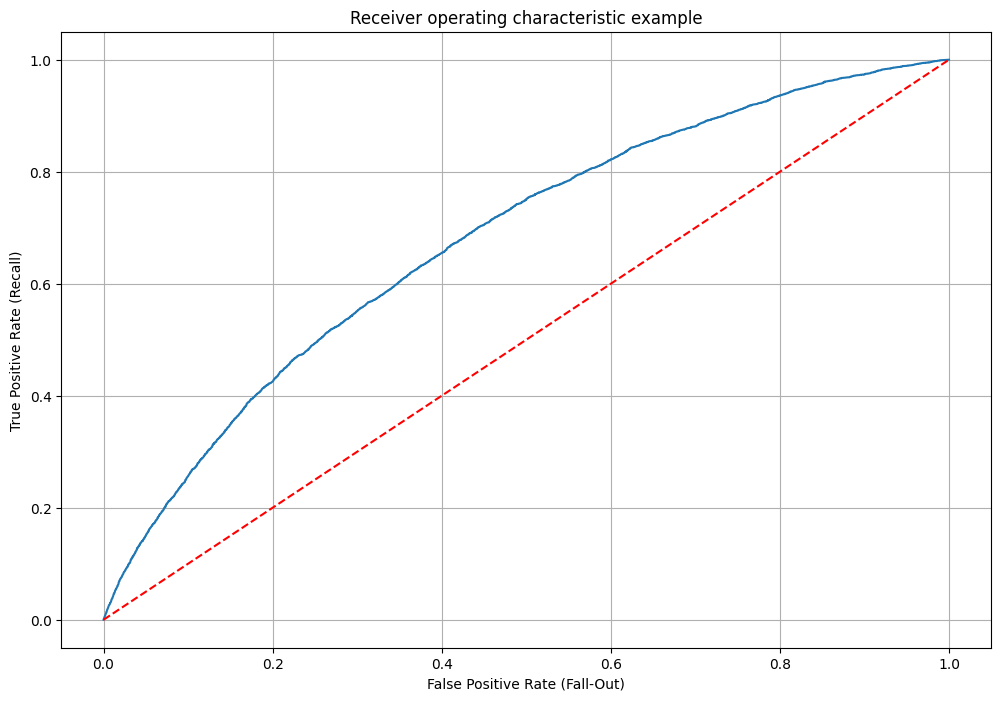

In [24]:
from sklearn.metrics import classification_report, roc_curve, auc

print(classification_report(result_test['delayed'], result_test['predict']))

fpr, tpr, thresholds = roc_curve(result_test['delayed'], result_test['delayed_prob'])

print(auc(fpr, tpr))



plt.figure(figsize=(12, 8))

plt.plot(fpr, tpr)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])


plt.plot([0, 1], [0, 1], 'r--', label="random guess")


plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.savefig('ROC_Curve')
plt.show()

In [25]:
# load the model from disk
import pickle
filename = 'grading_by_risk_score.sav'
loaded_grading_dt = pickle.load(open(filename, 'rb'))

grade_result = pd.read_pickle('grade_result.pkl')

In [26]:
result_test['grade_temp'] = loaded_grading_dt.apply(result_test['score'].values.reshape(-1, 1))
result_test = pd.merge(result_test, grade_result, on = 'grade_temp')

In [27]:
result_test[['delayed','grade_final']].groupby(['grade_final']).agg(['sum','count'])

delayed       
                sum  count
grade_final               
1               166   6561
2               247   6846
3               286   5636
4               826  13774
5              1380  15660
6              1176  10662
7              1394   8696
8               486   2548
9               472   2063
10              322   1178

In [28]:
result_test_final = result_test.sort_values(by = ['date','time_exp'])

In [29]:
result_test_final.reset_index(inplace = True)

In [30]:
result_test_final

,index,date,day,flight,time_exp,time_real,airport,airport_desc,type,terminal,...,odds,score_temp,score,normal_cusum,delayed_cusum,normal_cusum_ratio,delayed_cusum_ratio,diff_cusum_ratio,grade_temp,grade_final
0,67103,20180501,화,EK323Y,0005,0002,DXB,두바이,D,T1,...,91.577741,325.846254,349.717404,60515,6589,0.904978,0.975426,0.070447,14,1
1,72839,20180501,화,KE473,0005,0017,MLE,말레,D,T2,...,1424.543037,523.814175,547.685324,66097,6743,0.988455,0.998224,0.009768,14,1
2,37029,20180501,화,PR469Y,0015,0024,MNL,마닐라,D,T1,...,15.981658,199.917260,223.788410,32085,4945,0.479819,0.732050,0.252232,7,5
3,66723,20180501,화,SQ007,0035,0042,SIN,싱가포르,D,T1,...,87.619233,322.658784,346.529934,60147,6577,0.899475,0.973649,0.074174,18,2
4,52694,20180501,화,QR859,0045,0112,DOH,도하,D,T1,...,32.190662,250.428518,274.299668,46747,5948,0.699083,0.880533,0.181450,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73619,72978,20180930,일,SQ603,2320,2330,SIN,싱가포르,D,T1,...,99999.000000,830.481302,854.352452,66230,6749,0.990444,0.999112,0.008668,14,1
73620,73087,20180930,일,KE647,2330,2345,SIN,싱가포르,D,T2,...,99999.000000,830.481302,854.352452,66339,6749,0.992074,0.999112,0.007038,14,1
73621,73163,20180930,일,HX623,2335,2337,HKG,홍콩,D,T1,...,99999.000000,830.481302,854.352452,66415,6749,0.993211,0.999112,0.005901,14,1
73622,72984,20180930,일,TK091,2355,2348,IST,이스탄불,D,T1,...,99999.000000,830.481302,854.352452,66236,6749,0.990534,0.999112,0.008578,14,1
